# Ejemplo Serie Mensual Acciones Microsoft

En primer lugar, llamemos algunas de las librerías que vamos a usar:

In [34]:
library(TSA)
library(tseries)
library(forecast)
library(urca)
library(fUnitRoots)
library(astsa)

Importamos los datos (fuente: https://es.investing.com/)

In [36]:
msft<-read.delim("clipboard", header = T, dec = ",")
head(msft)

Fecha,Último
ene-00,48.94
feb-00,44.69
mar-00,53.12
abr-00,34.88
may-00,31.28
jun-00,40.00


Ahora, convertimos los datos en serie de tiempo:

In [37]:
s.msft<-ts(msft$Último, start = c(2000,1), freq = 12); s.msft

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2000 48.94 44.69 53.12 34.88 31.28 40.00 34.91 34.91 30.16 34.44 28.69 21.69
2001 30.53 29.50 27.34 33.88 34.59 36.50 33.09 28.52 25.59 29.07 32.10 33.12
2002 31.86 29.17 30.16 26.13 25.45 27.35 23.99 24.54 21.87 26.73 28.84 25.85
2003 23.73 23.70 24.21 25.56 24.61 25.64 26.41 26.52 27.80 26.14 25.71 27.37
2004 27.65 26.53 24.93 26.13 26.23 28.56 28.49 27.30 27.65 27.97 26.81 26.72
2005 26.28 25.16 24.17 25.30 25.80 24.84 25.61 27.38 25.73 25.70 27.68 26.15
2006 28.15 26.87 27.21 24.15 22.65 23.30 24.06 25.70 27.35 28.71 29.36 29.86
2007 30.86 28.17 27.87 29.94 30.69 29.47 28.99 28.73 29.46 36.81 33.60 35.60
2008 32.60 27.20 28.38 28.52 28.32 27.51 25.72 27.29 26.69 22.33 20.22 19.44
2009 17.10 16.15 18.37 20.26 20.89 23.77 23.52 24.65 25.72 27.73 29.41 30.48
2010 28.18 28.67 29.29 30.54 25.80 23.01 25.81 23.46 24.49 26.66 25.26 27.91
2011 27.73 26.58 25.39 25.92 25.01 26.00 27.40 26.60 24.89 26.63 25.58 25.96

Grafiquemos la serie:

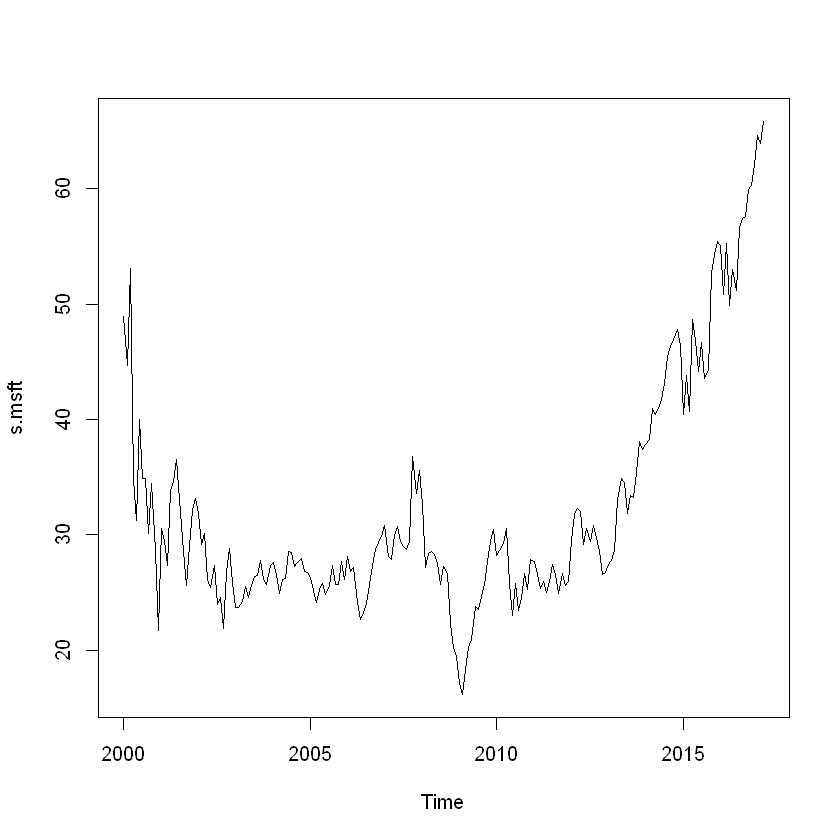

In [38]:
ts.plot(s.msft)

Podemos hacer un gráfico más detallado:

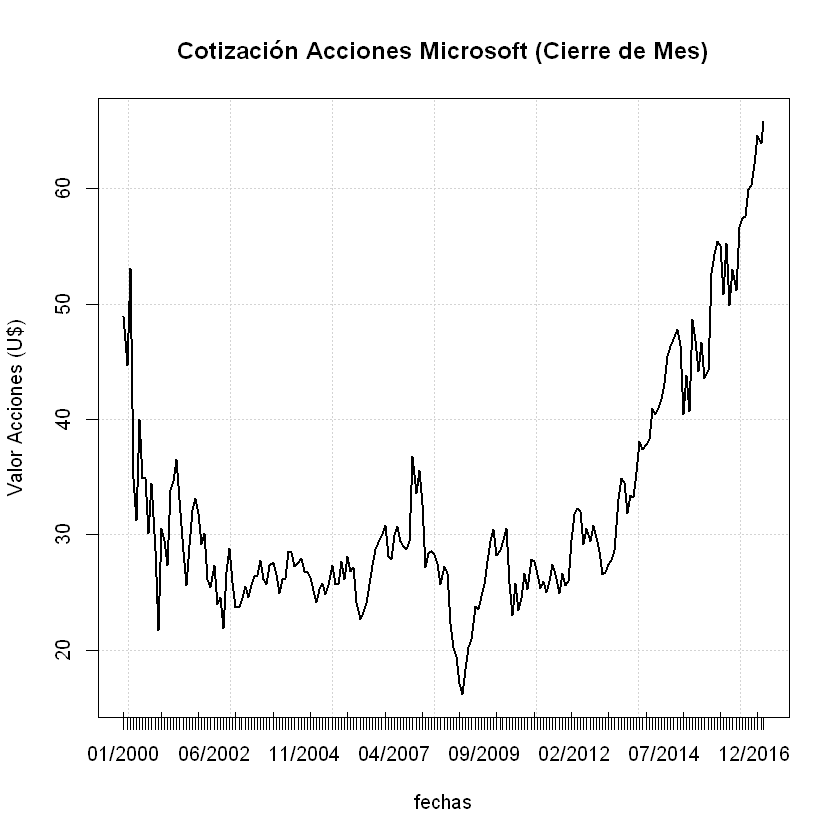

In [39]:
y<-s.msft
fechas = seq(as.Date("2000/1/1"), length.out = length(y), by = "months")
# otros comandos para graficar con fechas con mas detalle: mes año
np = length(y)
ejex.mes = seq(fechas[1],fechas[np], "months")
ejex.año = seq(fechas[1],fechas[np],"years")
plot(fechas,y, main="Cotización Acciones Microsoft (Cierre de Mes)", xaxt="n", 
     panel.first = grid(),type="l",ylab="Valor Acciones (U$)", lwd = 2)
axis.Date(1, at=ejex.mes, format="%m/%Y")
axis.Date(1, at=ejex.año, labels = FALSE, tcl = 0.2)

Exploremos un poco la serie:

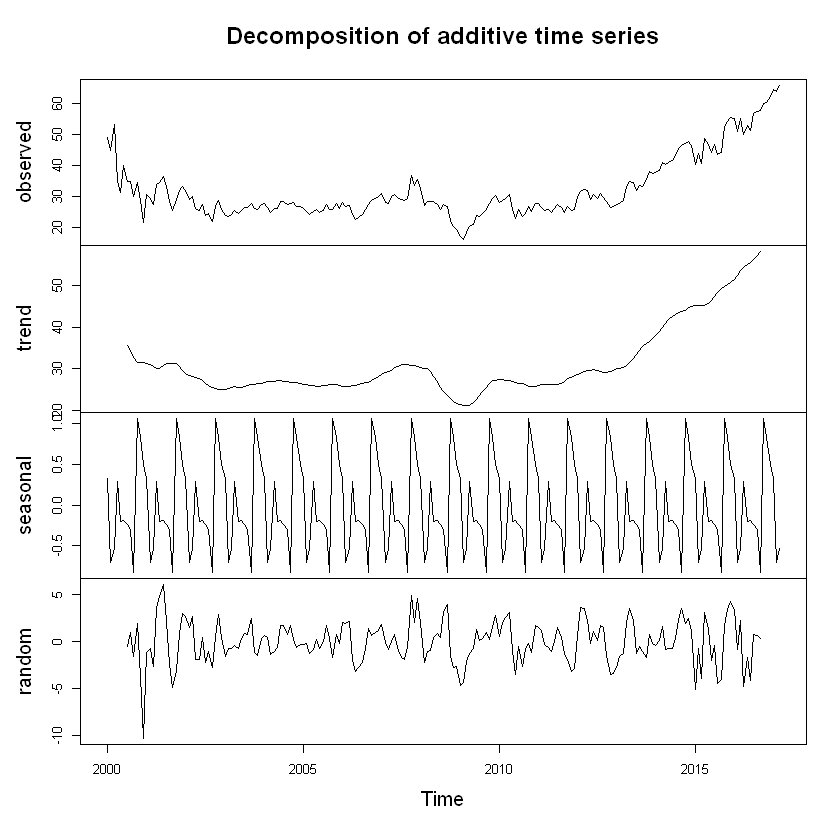

In [40]:
plot(decompose(y))

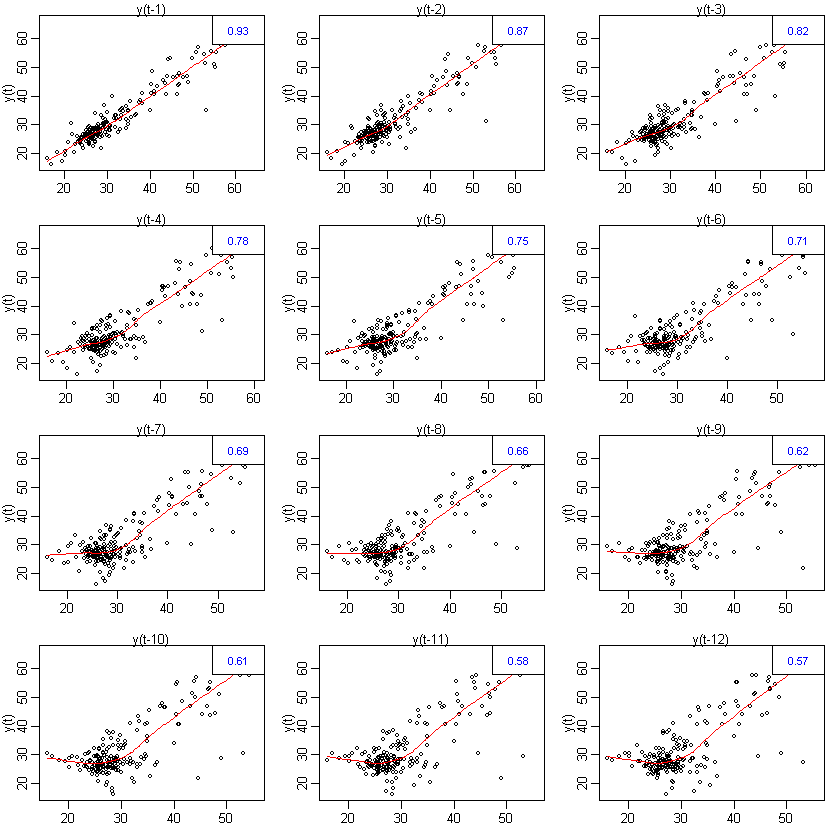

In [41]:
lag1.plot(y,12)

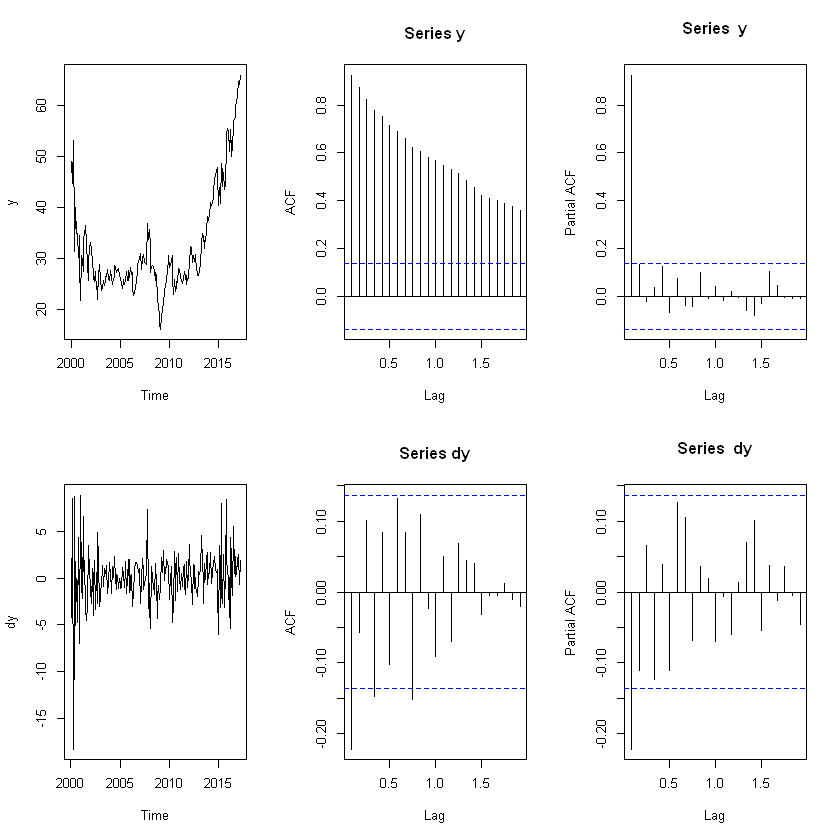

In [42]:
dy<-diff(y)
par(mfrow=c(2,3))
plot(y); acf(y); pacf(y)
plot(dy); acf(dy); pacf(dy)
par(mfrow=c(1,1))

In [43]:
cycle(y)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2000   1   2   3   4   5   6   7   8   9  10  11  12
2001   1   2   3   4   5   6   7   8   9  10  11  12
2002   1   2   3   4   5   6   7   8   9  10  11  12
2003   1   2   3   4   5   6   7   8   9  10  11  12
2004   1   2   3   4   5   6   7   8   9  10  11  12
2005   1   2   3   4   5   6   7   8   9  10  11  12
2006   1   2   3   4   5   6   7   8   9  10  11  12
2007   1   2   3   4   5   6   7   8   9  10  11  12
2008   1   2   3   4   5   6   7   8   9  10  11  12
2009   1   2   3   4   5   6   7   8   9  10  11  12
2010   1   2   3   4   5   6   7   8   9  10  11  12
2011   1   2   3   4   5   6   7   8   9  10  11  12
2012   1   2   3   4   5   6   7   8   9  10  11  12
2013   1   2   3   4   5   6   7   8   9  10  11  12
2014   1   2   3   4   5   6   7   8   9  10  11  12
2015   1   2   3   4   5   6   7   8   9  10  11  12
2016   1   2   3   4   5   6   7   8   9  10  11  12
2017   1   2   3                              

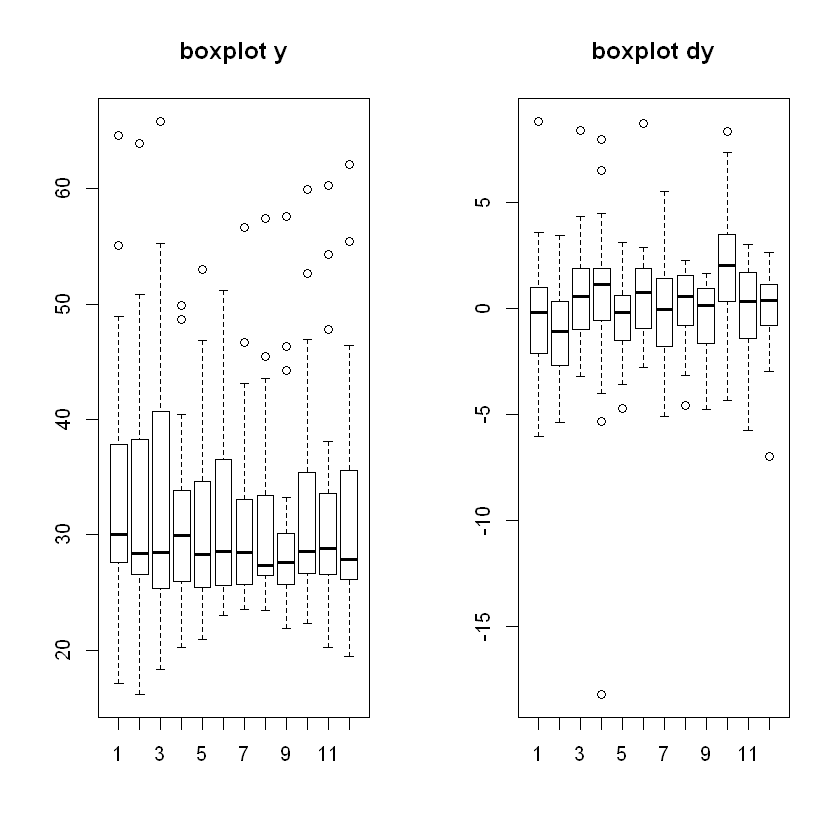

In [44]:
par(mfrow=c(1,2))
boxplot(y~cycle(y), main = "boxplot y")
boxplot(dy~cycle(dy), main = "boxplot dy")
par(mfrow=c(1,1))

In [45]:
summary(y);summary(dy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.15   25.94   28.52   32.29   34.89   65.86 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-18.24000  -1.22000   0.35000   0.08214   1.53500   8.84000 

In [46]:
var(y);var(dy)

[1] 101.7826

[1] 8.483066

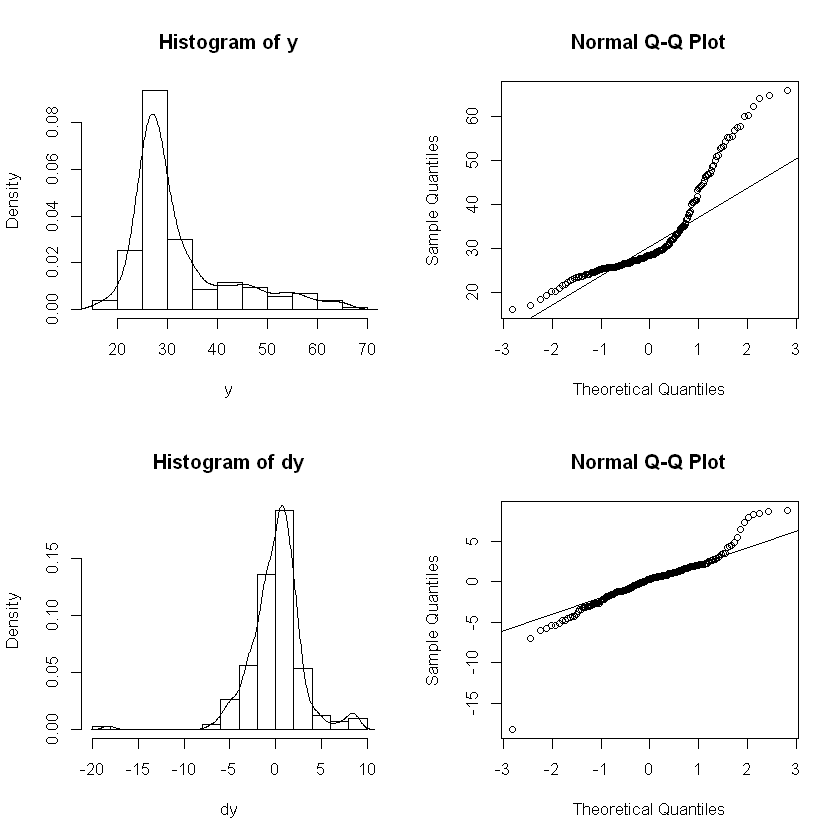

In [47]:
par(mfrow=c(2,2))
hist(y, prob=TRUE, 12)
lines(density(y))
qqnorm(y)
qqline(y)

hist(dy, prob=TRUE, 12)
lines(density(dy))
qqnorm(dy)
qqline(dy)
par(mfrow=c(1,1))

In [48]:
ur.df(y,lags=12) # Cuántas raíces hay
ur.df(dy,lags=12)# Cuántas raíces hay


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: 1.8566 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -3.9091 


In [49]:
adf.test(y) ## Hay o no raiz unitaria?
adf.test(dy)## Hay o no raiz unitaria?


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -0.95998, Lag order = 5, p-value = 0.9427
alternative hypothesis: stationary


Warning message in adf.test(dy):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  dy
Dickey-Fuller = -7.9936, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


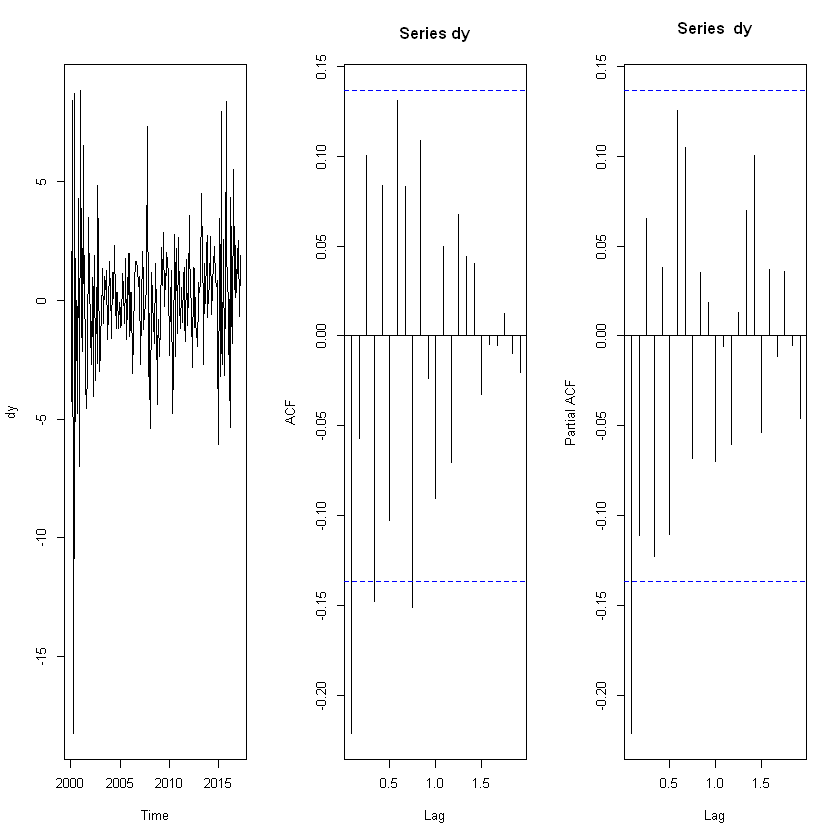

In [50]:
par(mfrow=c(1,3))
plot(dy); acf(dy); pacf(dy)
par(mfrow=c(1,1))

In [51]:
m1<-arima(dy, order = c(2,0,1))
m2<-arima(dy, order = c(3,0,1))
m3<-arima(dy, order = c(2,0,2))
m4<-arima(dy, order = c(1,0,2))
m5<-arima(dy, order = c(3,0,2))
m6<-arima(dy, order = c(3,0,3))
m7<-arima(dy, order = c(1,0,1))

AIC(m1,m2,m3,m4,m5,m6,m7)
BIC(m1,m2,m3,m4,m5,m6,m7)

,df,AIC
m1,5,1015.169
m2,6,1016.940
m3,6,1014.313
m4,5,1016.786
m5,7,1021.791
m6,8,1019.705
m7,4,1019.715


,df,BIC
m1,5,1031.808
m2,6,1036.908
m3,6,1034.281
m4,5,1033.425
m5,7,1045.086
m6,8,1046.328
m7,4,1033.027


In [52]:
m1$loglik
m3$loglik

[1] -502.5844

[1] -501.1567

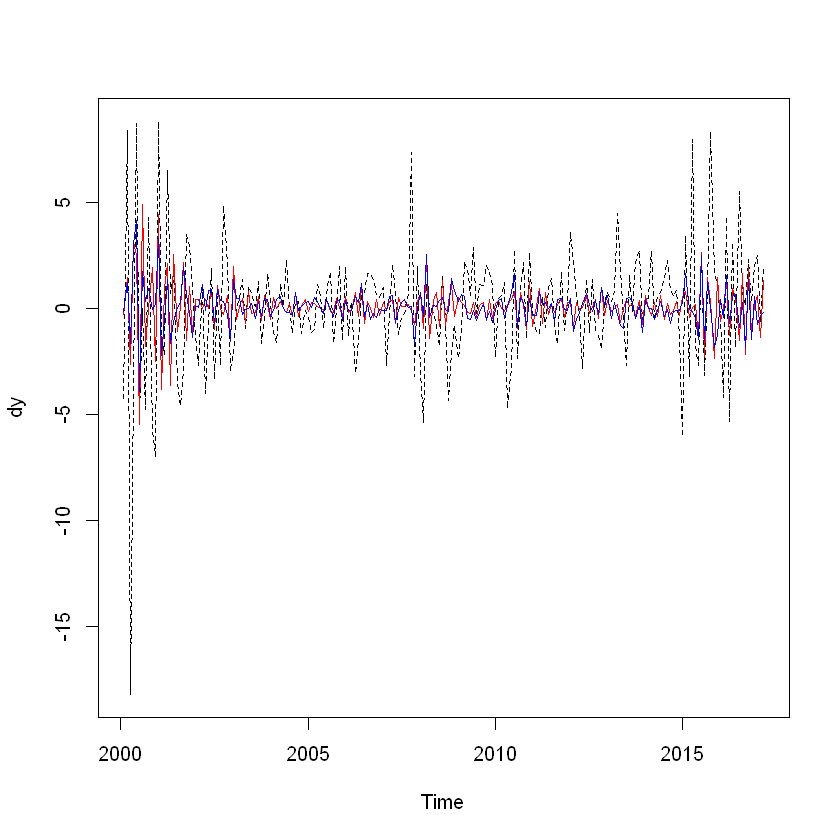

In [53]:
plot(dy,lty=2)
lines(fitted(m3),col='red')
lines(fitted(m1),col='blue')

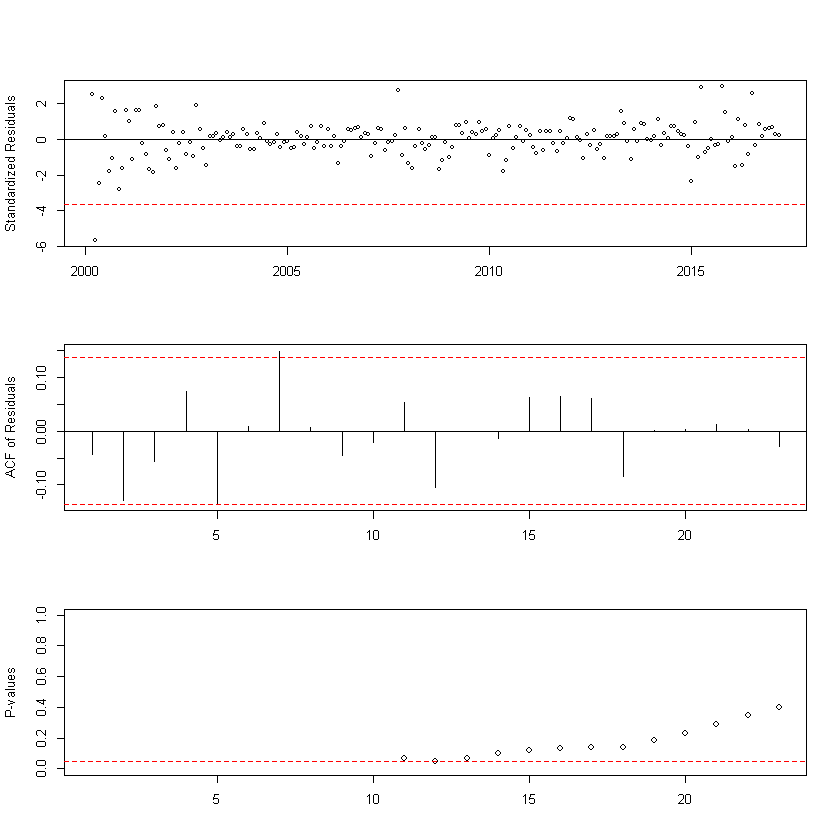

In [54]:
tsdiag(m3)

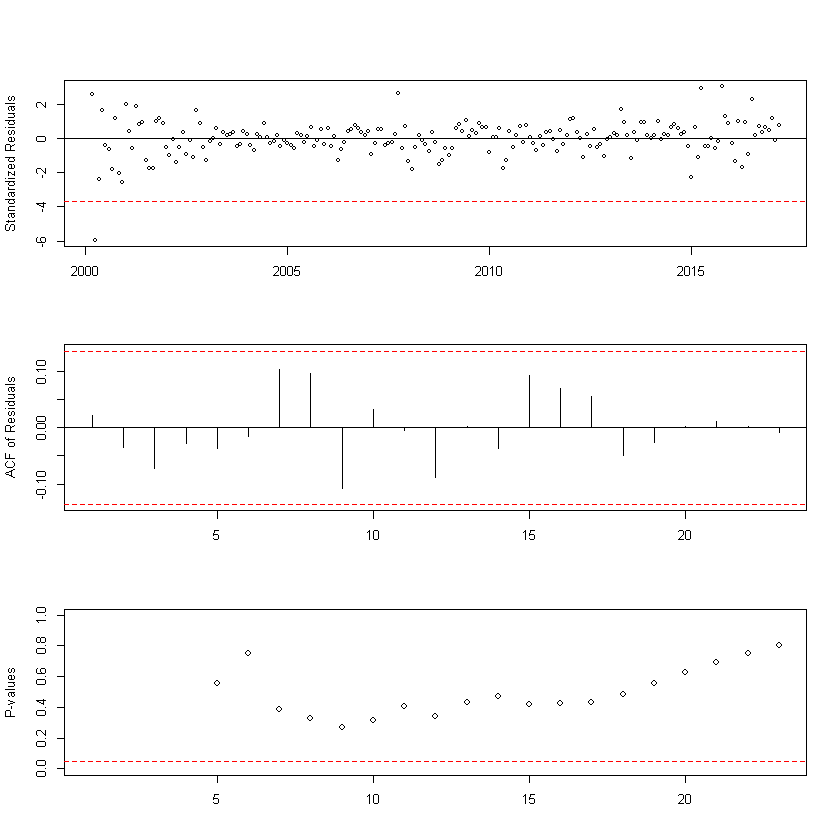

In [55]:
tsdiag(m1)

In [56]:
res1<-residuals(m1)
res3<-residuals(m3)

In [57]:
Box.test(res1, lag = 12, type = c("Ljung-Box"), fitdf = 0)


	Box-Ljung test

data:  res1
X-squared = 10.09, df = 12, p-value = 0.6081


In [58]:
Box.test(res3, lag = 12, type = c("Ljung-Box"), fitdf = 0)


	Box-Ljung test

data:  res3
X-squared = 15.812, df = 12, p-value = 0.2


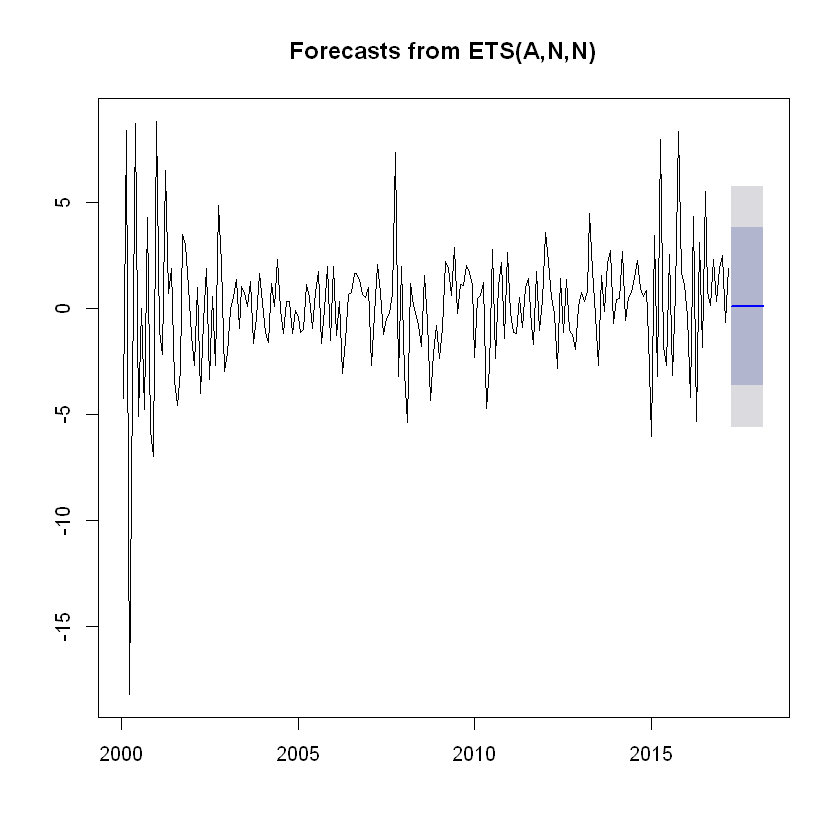

In [59]:
plot(predict(dy,12))

In [60]:
pred.m1<-predict(m1,12);pred.m1
pred.m3<-predict(m3,12);pred.m3

$pred
             Jan         Feb         Mar         Apr         May         Jun
2017                                      0.12413168 -0.50411110  0.65934221
2018  0.08925793  0.07667795  0.08581122                                    
             Jul         Aug         Sep         Oct         Nov         Dec
2017 -0.32050503  0.31264215 -0.02742652  0.12287136  0.07468486  0.07763821
2018                                                                        

$se
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017                            2.773934 2.837774 2.847733 2.878615 2.899919
2018 2.911705 2.911708 2.911712                                             
          Sep      Oct      Nov      Dec
2017 2.908676 2.911175 2.911657 2.911705
2018                                    


$pred
             Jan         Feb         Mar         Apr         May         Jun
2017                                     -0.71699590  0.08168772  0.79514783
2018  0.78652171 -0.26628368 -0.01054302                                    
             Jul         Aug         Sep         Oct         Nov         Dec
2017 -0.98610404  1.06620657 -0.44995683  0.01876540  0.65373561 -0.71741616
2018                                                                        

$se
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017                            2.751846 2.772031 2.772191 2.792981 2.834970
2018 2.911821 2.927996 2.931446                                             
          Sep      Oct      Nov      Dec
2017 2.867613 2.876037 2.876476 2.889144
2018                                    


In [62]:
micro<-read.delim("clipboard", header = F, dec = ",")
s.micro<-ts(micro, start=c(2017,4), freq = 12)
s.micro

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2017                    2.60  1.38 -0.91  3.77  2.07 -0.28  8.69  0.99  1.37
2018  9.47 -1.24 -0.88                                                      

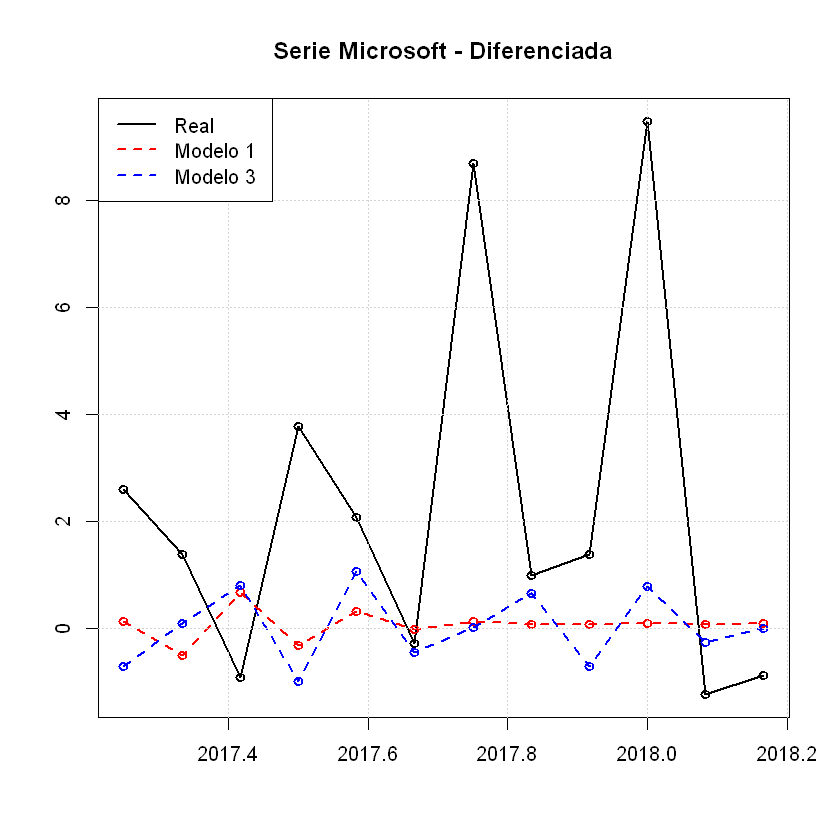

In [63]:
plot(s.micro,lwd=2,main='Serie Microsoft - Diferenciada',ylab='',
xlab='', type='o')
points(pred.m1$pred,col='red',lwd=2)
lines(pred.m1$pred,col='red',lwd=2,lty=2)
points(pred.m3$pred,col='blue',lwd=2)
lines(pred.m3$pred,col='blue',lwd=2,lty=2)
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted",
     lwd = par("lwd"), equilogs = TRUE)
legend('topleft', c('Real', 'Modelo 1', 'Modelo 3'),
lty=c(1,2,2), lwd=2, col = c('black', 'red', 'blue'))